**Lab 5: FIR Filtering 2**

The goal of this lab is to study the response of FIR filters to inputs such as complex exponentials and sinusoids. In the experiments of this lab, you will use `np.convolve()` to implement filters and `freqz()` to obtain the filter’s frequency response. As a result, you should learn how to characterize a filter by knowing how it reacts to different frequency components in the input.
This lab also introduces two practical filters: bandpass filters and nulling filters.
Bandpass filters can be used to detect and extract information from complex signals,
e.g., tones in a touch-tone telephone dialer. Nulling filters can be used to remove
sinusoidal interference, e.g., jamming signals in a radar.

In [1]:
import os
import numpy as np
import librosa
import IPython.display as ipd
from scipy import signal
import matplotlib.pyplot as plt

from util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram

1.1. First, let's replicate what we did until now. Copy the functions synthesize and envelope and obtain the synthesis from the last lab.

In [2]:
# Write your code here
def synthesize(f0, phi, Ak, t):
    y = 0
    for k in range(1, len(Ak) + 1):
        y += Ak[k-1] * np.cos(2*np.pi*k*f0*t + k*phi - (k-1)*np.pi/2)
    return y

def envelope(x, N):
    """
    Extracts the envelope of the input signal x by concatenating a full-wave rectifier and an N-point averaging filter.

    Parameters
    ----------
    x : np.array
        The input signal in the form of a numpy array
    N : int
        The number of points used in N-point averaging filter

    Returns
    -------
    y : np.array
        The output of the system, i.e., the envelope of the signal x.
    """
    rectified_signal = np.abs(x)
    filter_coeffs = np.ones(N) / N
    envelope_signal = np.convolve(rectified_signal, filter_coeffs, mode='same')

    return envelope_signal

1.2 Plot both reference and synthesised signal.

In [3]:
filepath = "./ourSign/44733__casualdave__601e.wav"
ref, fs = load_audio(filepath)

filepath = "./ourSign/synthesized_signal_env.wav"
envref, envfs = load_audio(filepath)

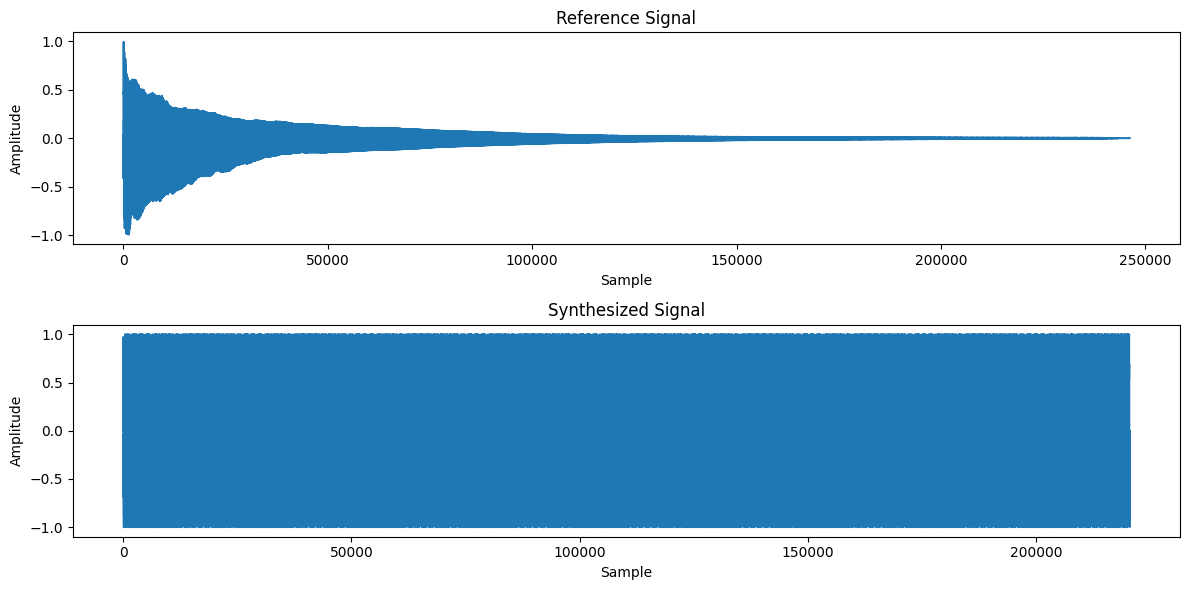

In [ ]:
# Plotting the reference signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(ref)
plt.title('Reference Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plotting the synthesized signal
plt.subplot(2, 1, 2)
plt.plot(envref)
plt.title('Synthesized Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

---

**2. Averaging filter**

Now let's analyze the frequency response of the average filter used in the envelope function. The Scipy Python module has a function called *freqz()* for computing the frequency
response of a discrete-time LTI system. The following Python statements show how to
use freqz to compute and plot both the magnitude (absolute value) and the phase of
the frequency response of a four-point averaging system as a function of ω in the range − π ≤ ω ≤ π :

In [5]:
from sis1lab.util import plot_frequency_response

ww = np.arange(-np.pi, np.pi, np.pi/500)
_, HH = signal.freqz([1/4]*4, 1, ww)

plot_frequency_response(ww, HH)

ModuleNotFoundError: No module named 'sis1lab'

For FIR filters, the second argument of `freqz(-, 1,- )` must always be equal to 1. The frequency vector ww should cover an interval of length 2π for ω , and its spacing must be fine enough to give a smooth curve for H(ejω) . Note: we will always use capital H for the frequency response.

2.1 Use the `freqz` and `plot_frequency_response` functions to plot the frequency response of the averaging filter of your envelope function.



In [ ]:
# Write your code here

y = np.convolve(x, [1, -2cos(wn), 1], "same")


2.2 Looking at the frequency responses, what are the main differences between your filter and the four-point averaging filter. What happens when the value N is increased?

[Double click to write your answer]

---

**3. Nulling Filters for Rejection**

Nulling filters are filters that completely eliminate some frequency components. If the frequency is $\omega=0$ or $\omega=\pi$ then a two-point FIR filter will do the nulling. The simplest possible general nulling filter can have as few as three coefficients. If $\omega_n$ is the desired nulling frequency, then the following length-3 FIR filter

$$
y[n] = x[n] - 2\cos(\omega_n)x[n-1] + x[n-2] 
$$

will have a zero in its frequency response at $\omega=\omega_n$. For example, a filter designed to completely eliminate signals of the form $e^{j0.5\pi}$ would have the following coefficients because we would pick the desired nulling frequency to be $\omega_n = 0.5\pi$

$$
b_0 = 1, \quad b1=-2cos(\omega_n)=0, \quad b_2=1
$$

3.1 Use the following function to add an interference in your reference signal. Name the corrupted signal as `x_interf`.

In [ ]:
def add_interference(x, fs):
  t = np.linspace(0, len(x)*1/float(fs), len(x))
  y = x + (np.amax(x)/10)*np.sin(2*np.pi*1000*t)
  return y

In [ ]:
# Write your code here
x_interf = ...

3.2 Plot both the reference signal and the corrupted signal and listen to the latter one. 

In [ ]:
# Write your code here

3.3 Compare the spectrograms of the reference signal and the interference signal. 

In [ ]:
# Write your code here

3.4. Create a function `remove_interference(x, fs)` that applies a nulling filter devised to remove the interference at 1000 Hz. 

Note: remember that a frequency can be converted to the normalized radian frequncy by: $\omega_n = 2\pi f_n/f_s$

In [ ]:
def remove_interference(x, fs):
  """Applies nulling filter to remove an interference at 1000 Hz

  Parameters
  ----------
  x : np.array
      The input signal in the form of a numpy array
  fs : int or float
      Frequency rate in Hz

  Returns
  -------
  y : np.array
      The output of the filter

  """
  # Write your code here

3.5 Use the `remove_interference` funcion to clean the corrupted signal,  `x_interf`. Call the output as `x_clean`. Compare the spectrograms of both signals. Explain the result.

In [ ]:
# Write your code here